In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Завантаження даних
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# 1. Вивести перших 5 рядків
print(df.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [14]:
# 2. Перевірка на пропуски
print(df.isnull().sum())


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [15]:
# 3. Перевірка на дублікати
print("Кількість дублікатів:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Кількість дублікатів: 0


In [16]:
# 4. Перевірка унікальних значень у стовпчику 'age'
print("Унікальні значення 'age':", df['age'].unique())


Унікальні значення 'age': [ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306 -0.09269548
 -0.04547248  0.06350368  0.04170844 -0.07090025 -0.09632802  0.02717829
  0.01628068  0.04534098 -0.05273755 -0.00551455  0.07076875 -0.0382074
 -0.02730979 -0.04910502 -0.0854304  -0.06363517 -0.06726771 -0.10722563
 -0.02367725  0.05260606  0.06713621 -0.06000263  0.03444337  0.03081083
  0.04897352  0.01264814 -0.00914709 -0.09996055  0.01991321 -0.05637009
 -0.07816532 -0.04183994  0.05987114 -0.03457486 -0.03094232 -0.10359309
 -0.01641217  0.00175052 -0.02004471  0.0562386   0.02354575  0.0090156
 -0.07453279 -0.01277963 -0.08179786  0.08166637  0.11072668  0.09256398
  0.07440129  0.07803383  0.09619652  0.08893144]


In [17]:

# 5. Перевірка типів даних
print(df.dtypes)


age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


Кореляція з цільовою змінною:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


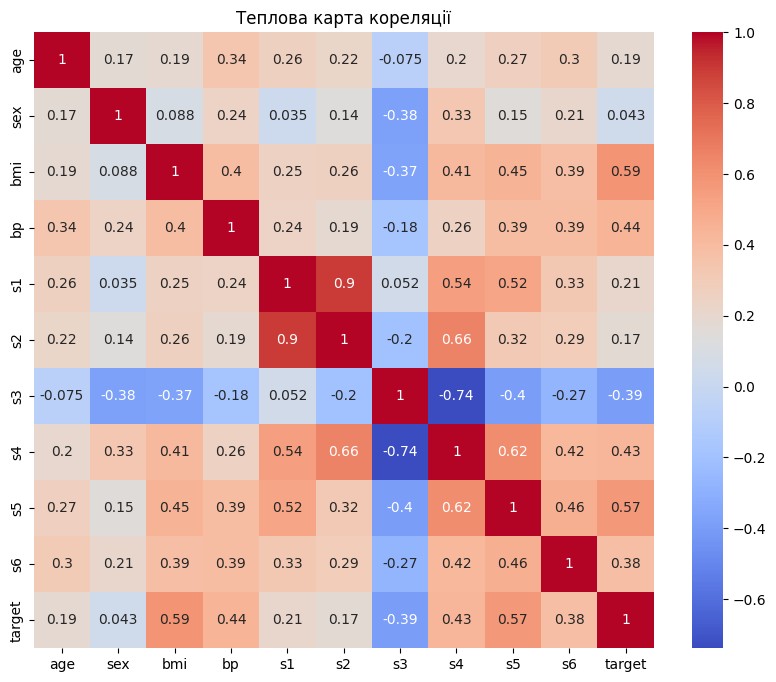

In [18]:
# 6. Обчислення кореляції
correlation = df.corr()['target'].sort_values(ascending=False)
print("Кореляція з цільовою змінною:")
print(correlation)
# Побудова теплової карти кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Теплова карта кореляції')
plt.show()


In [19]:

# 7. Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns[:-1])



In [20]:
# 8. Поділ на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, df['target'], test_size=0.2, random_state=42)



In [21]:
# 9. Побудова моделей
# Виберемо 5 найбільш корелюючих ознак
top_features = correlation.index[1:6]  # Перший елемент - сама цільова змінна
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Лінійна регресія
lr_model = LinearRegression()
lr_model.fit(X_train_top, y_train)

# Random Forest регресія
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_top, y_train)



RandomForestRegressor(random_state=42)

In [22]:
# 10. Обчислення метрик
models = {'Linear Regression': lr_model, 'Random Forest': rf_model}

for name, model in models.items():
    y_pred = model.predict(X_test_top)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}:")
    print(f"R-squared: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print()



Linear Regression:
R-squared: 0.4527
MSE: 2899.7427

Random Forest:
R-squared: 0.4175
MSE: 3086.4159



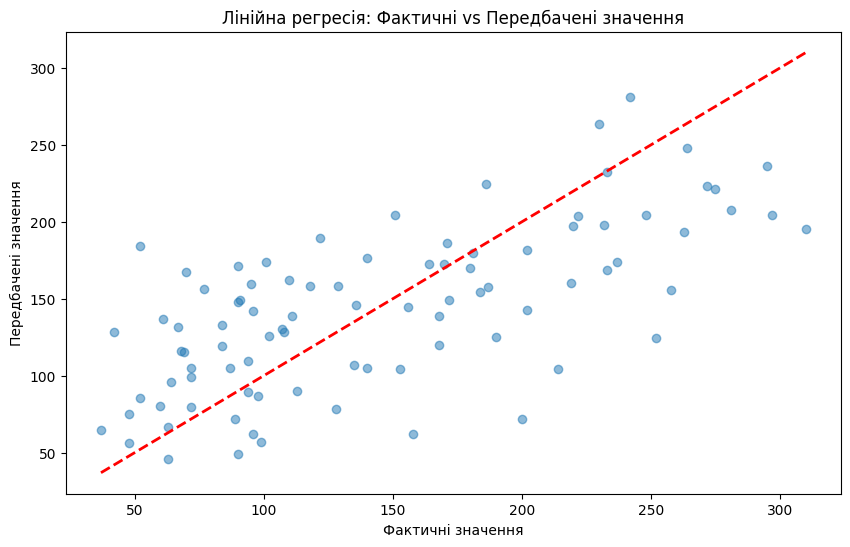

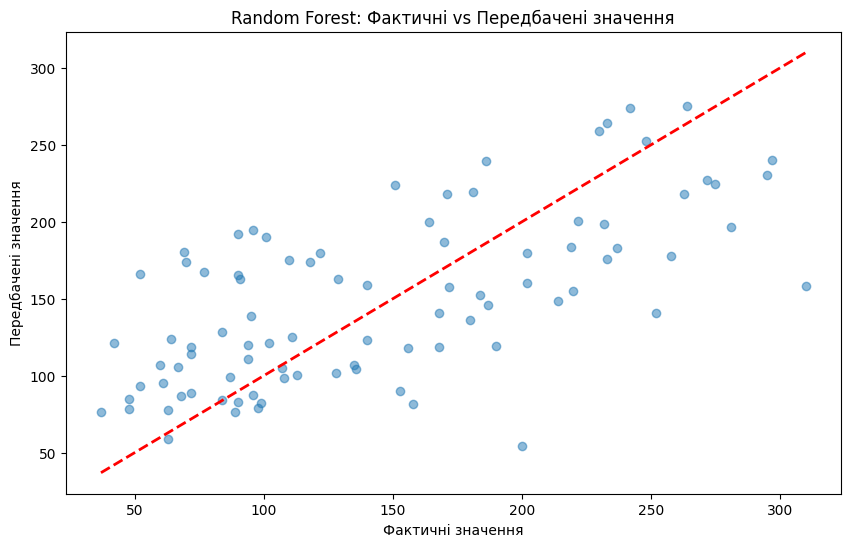

In [23]:
# 11. Побудова графіків
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_model.predict(X_test_top), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактичні значення')
plt.ylabel('Передбачені значення')
plt.title('Лінійна регресія: Фактичні vs Передбачені значення')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_model.predict(X_test_top), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактичні значення')
plt.ylabel('Передбачені значення')
plt.title('Random Forest: Фактичні vs Передбачені значення')
plt.show()

